# In this workshop you will learn:
- Basics of R (objects, variables, data classes, vectors)
- How to write R functions
- How to import and export your own files
- How to install and load R and Bioconductor packages

# What is R?
- R is a language and environment for statistical computing and graphics (https://www.r-project.org/about.html). 
- It is free and can be tailored to your needs by installing and using specific packages (https://cran.r-project.org/web/packages/available_packages_by_name.html).
- You can use R interactively (e.g., enter commands into the R console or R Studio https://rstudio.com/) or into new cells in your Jupyter notebook.
- You can write and run R scripts or generate reports and documents using R notebooks (https://blog.rstudio.com/2016/10/05/r-notebooks/) and markdown files (https://rmarkdown.rstudio.com/).

# Interacting with R
- You can use R interactively and have it do some simple math:

In [122]:
2 - 1

[1] 1

- It is generally more useful to assign your values to **variables**, which are R objects.
- You can assign values to R variables using the assignment operator **'<-'**, which assigns the value on the right to the variable on the left.
- There are other operators as well (like the `=` sign) but I would suggest you stick with the `<-` operator for now.
- Everything in R (including variables) is an object (https://cran.r-project.org/doc/manuals/r-release/R-lang.html#Objects)

<div class="alert alert-block alert-info">
<b>Tip:</b> We will use the words `object` and `variable` interchangably in this workshop.
</div>

Let's assign a variable called `a`:

In [123]:
a <- 1

R won't print anything when you assign a value to a variable. We can look at the output of our assignment by typing `a`.

In [124]:
a

[1] 1

- R also comes with a `print()` function that we can use to look at our variables.
- We will talk more about functions later in this workshop, but a **function** is a series of statements that work together to perform a specific task.
- All functions need pieces of information (or **arguments**) to perform their particular function, these arguments can be required or optional. 
- `print()` takes a single required argument -- the thing you want to print.

<div class="alert alert-block alert-info">
<b>Tip:</b> You can use `?function` in R to learn more about a particular function (for example: `?print`).
</div>

- Let's print variable `a`:

In [125]:
print(a)

[1] 1


We can name our variables any combination of letters, numbers, or underscores (`_`) with a few exceptions:
- R has a few reserved words that can't be used as variable names in R:
    - `if`, `else`, `repeat`, `while`, `function`, `for`, `in`
    - see the whole list of reserved words here: https://stat.ethz.ch/R-manual/R-devel/library/base/html/Reserved.html). 
- Variables can't start with a number or an underscore
- You can technically use `.` in your variable names, but this is best avoided.

For example:

In [126]:
bar <- 11
cat_1 <- 'cat' 
dog_ <- TRUE
egg <- (1L)
foo <- 2i

Now that we have assigned some values to variables, we can start using them:

In [127]:
print(bar)

[1] 11


In [128]:
print(bar * 2)

[1] 22


In [129]:
print(a)

[1] 1


In [130]:
print(a + bar)

[1] 12


# Data classes

- The variables you assign have some sort of data class associated with them.
- Data classes impact how functions will interact with your variables.
- R has 5 basic data classes, including:

1. `character`, which is a character 
2. `numeric`, which can be `real` (a rounded number) or `decimal` (a number including a decimal point).
3. `integer`, which can be a rounded number (but not a decimal) 
4. `logical`, which can be either `TRUE` or `FALSE`
5. `complex`, allows you to use imaginary numbers 

- You can also have missing data, which we will also talk about later in this workshop.

Let's look at the data classes of our variables we have just assigned:

In [131]:
class(a)
class(bar)
class(cat_1)
class(dog_)
class(egg)
class(foo)

[1] "numeric"

[1] "numeric"

[1] "character"

[1] "logical"

[1] "integer"

[1] "complex"

- The `L` we included when we assigned `egg` tells R that this object is an integer.
- The `i` we included when we assigned `foo` indicates an imaginary number, making `foo` complex data class object.

In [132]:
#?class

# R data structures
- R objects can also contain more than one element.
- Objects that contain more than one element are organized into different data structures.
- Data structures in R include vectors (also referred to as 'atomic vectors' in R), lists, matrices, arrays, and data frames.

### Vectors
- Probably the simplest R object that contains more than one element is a **vector**. 
- You can create a vector using the concatenate function, `c()`, or directly assigning them. 
- The `c()` function will coerce all of the arguments to a common data type and combine them to form a vector. 
- Here's a few examples of how you can assign vectors:

In [133]:
numeric_vector <- c(1,2,3,4,5) 
character_vector <- c('one', 'two', 'three', 'four', 'five') 
integer_vector <- (6:12) 
logical_vector <- c(TRUE, TRUE, FALSE)
character_vector_2 <- c('a', 'pug', 'is', 'not', 'a', 'big', 'dog')

Note that I used `:` when assigning `integer_vector`, which just generates a list from 6 through 12.

In [134]:
print(numeric_vector)
print(character_vector)
print(integer_vector)
print(logical_vector) 
print(character_vector_2)

[1] 1 2 3 4 5
[1] "one"   "two"   "three" "four"  "five" 
[1]  6  7  8  9 10 11 12
[1]  TRUE  TRUE FALSE
[1] "a"   "pug" "is"  "not" "a"   "big" "dog"


Vectors also have class:

In [135]:
print(class(numeric_vector))
print(class(character_vector))
print(class(integer_vector))
print(class(logical_vector)) 
print(class(character_vector_2))

[1] "numeric"
[1] "character"
[1] "integer"
[1] "logical"
[1] "character"


You can combine vectors using `c()`

In [136]:
combined_vector <- c(numeric_vector, integer_vector)

In [137]:
print(combined_vector)

 [1]  1  2  3  4  5  6  7  8  9 10 11 12


You can use the `length()` function to see how long your vectors are:

In [138]:
print(length(combined_vector))

[1] 12


You can also access elements of the vector based on the index (or its position in the vector):

In [139]:
print(combined_vector[2])

[1] 2


You can combine these operations, but note that R code evaluates from the inside out:

In [140]:
print(combined_vector[length(combined_vector)])

[1] 12


Here, R is reading `length(combined_vector)` first. The value returned by the `length()` function is then used to access the last entry in the `combined_vector` vector.

You can also name vector elements and then access them by their names:

In [141]:
names(numeric_vector) <- c('one', 'two', 'three', 'four', 'five')
print(numeric_vector)

  one   two three  four  five 
    1     2     3     4     5 


In [142]:
print(numeric_vector['three'])

three 
    3 


We can use `-c` to remove vector elements:

In [143]:
print(combined_vector[-c(4)])

 [1]  1  2  3  5  6  7  8  9 10 11 12


If a vector is numerical, we can also perform some math operations on the entire vector. Here, we can calculate the sum of a vector:

In [144]:
print(combined_vector)
print(sum(combined_vector))

 [1]  1  2  3  4  5  6  7  8  9 10 11 12
[1] 78


In [145]:
print(combined_vector/sum(combined_vector))

 [1] 0.01282051 0.02564103 0.03846154 0.05128205 0.06410256 0.07692308
 [7] 0.08974359 0.10256410 0.11538462 0.12820513 0.14102564 0.15384615


Use the `round()` function to specify you only want 3 digits reported and assign it to a variable called `rounded`

In [146]:
rounded <- round((combined_vector/sum(combined_vector)), digits = 3)
print(rounded)

 [1] 0.013 0.026 0.038 0.051 0.064 0.077 0.090 0.103 0.115 0.128 0.141 0.154


You can also perform math operations on two vectors...

In [147]:
print(rounded + combined_vector)

 [1]  1.013  2.026  3.038  4.051  5.064  6.077  7.090  8.103  9.115 10.128
[11] 11.141 12.154


but you'll get weird results if the vectors are different lengths:

In [148]:
print(combined_vector)
print(numeric_vector)

 [1]  1  2  3  4  5  6  7  8  9 10 11 12
  one   two three  four  five 
    1     2     3     4     5 


In [149]:
print(combined_vector + numeric_vector)

Warning message in combined_vector + numeric_vector:
“longer object length is not a multiple of shorter object length”

 [1]  2  4  6  8 10  7  9 11 13 15 12 14


It looks like R will give you an error message and then go back to the start of the shorter vector.

**Coercing between classes**

Let's say you're trying to import some data into R, maybe a vector of measurements:

In [150]:
your_data <- c('6','5','3','2','11','0','9','9')
class(your_data)

[1] "character"

You vector is a character vector because the elements of the vector are in quotes. You can coerce them back into numeric values using `as.numeric()`:

In [151]:
your_new_data <- as.numeric(your_data)
print(your_new_data)
class(your_new_data)

[1]  6  5  3  2 11  0  9  9


[1] "numeric"

What happens if we try to `as.numeric` things that aren't numbers?

In [152]:
as.numeric(character_vector_2)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] NA NA NA NA NA NA NA

<div class="alert alert-block alert-warning">
<b>Example:</b> <b>&ltNA&gt</b> indicates that these are missing values, so be careful when converting between classes.
</div>

# Missing values
Missing values can result from things like inappropriate coersion, Excel turning everything into a date, encoding format problems, etc.

In [153]:
here_is_a_vector <- as.numeric(c(4/61, 35/52, '19-May', 3/40))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

We can use the `is.na()` function to see if our vector has any `<NA>` values in it:

In [154]:
is.na(here_is_a_vector)

[1] FALSE FALSE  TRUE FALSE

You can combine this with the `table()` function to see some tabulated results from `is.na()`:

In [155]:
table(is.na(here_is_a_vector))


FALSE  TRUE 
    3     1 

You might also encounter an `NaN`, which means 'not a number' and is the result of invalid math operations:

In [156]:
0/0

[1] NaN

`NULL` is another one you might encounter, and it is the result of trying to query a parameter that is undefined for a specific object. For example, you can use the `names()` function to retrieve names assigned to an object. What happens when you try to use this function on an object you haven't named?

In [157]:
names(here_is_a_vector)

NULL

You might also see `Inf` or `-Inf` which are positive or negative infinity, which result from dividing by zero or operations that do not converge:

In [158]:
1/0

[1] Inf

# Matrices
- A matrix in R is a collection of elements organized into rows and columns.
- All columns must be the same data type and be the same length.
- Generate a matrix using the following general format:

```
my_matrix <- matrix(
    vector, 
    nrow = r, 
    ncol = c, 
    byrow = FALSE)
```

For example:

In [159]:
my_matrix <- matrix(
    c(1:12), 
    nrow = 3, 
    ncol = 4, 
    byrow = FALSE)

print(my_matrix)

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12


In the above code, we made `my_matrix`, we specified it should be populated by the vector `c(1:12)`, with 3 rows (`nrow = 3`) and 4 columns (`ncol = 4`) and be populated by column, not by row (`byrow = FALSE`)

We can access the rows and columns by their numerical index using a `[row, column]` format.
For example, here's how we access row 3 and column 4:

In [160]:
my_matrix[3,4]

[1] 12

Access entire row 3:

In [161]:
print(my_matrix[3,])

[1]  3  6  9 12


Access entire column 4:

In [162]:
print(my_matrix[,4])

[1] 10 11 12


You can also name the rows and columns and then access them by name. 
For example, lets name the rows and columns of `my_matrix`

In [163]:
dimnames(my_matrix) <- list(
    c('row_1', 'row_2', 'row_3'), 
    c('column_1', 'column_2', 'column_3', 'column_4'))

You can also name the rows and columns separately using `rownames()` and `colnames()` 

In [164]:
rownames(my_matrix) <- c('row_1', 'row_2', 'row_3')
colnames(my_matrix) <- c('column_1', 'column_2', 'column_3', 'column_4')

In [165]:
print(my_matrix)

      column_1 column_2 column_3 column_4
row_1        1        4        7       10
row_2        2        5        8       11
row_3        3        6        9       12


In [166]:
print(my_matrix['row_2',])

column_1 column_2 column_3 column_4 
       2        5        8       11 


In [167]:
print(my_matrix[,'column_2'])

row_1 row_2 row_3 
    4     5     6 


# Arrays
- An array can be similar to a matrix but they can have more than 2 dimensions (e.g., more than rows and columns)
- So, an array with 1 dimension is similar to a vector and an array with 2 dimensions is similar to a matrix.
- Generate an array with the following generic format:

```
my_array <- array(vector),dim = c(rows, columns, other_dims))
```

In [168]:
my_col_array <- array(
    c(1:12),
    dim = c(12,1,1))
print(my_col_array)

, , 1

      [,1]
 [1,]    1
 [2,]    2
 [3,]    3
 [4,]    4
 [5,]    5
 [6,]    6
 [7,]    7
 [8,]    8
 [9,]    9
[10,]   10
[11,]   11
[12,]   12



In [169]:
my_row_array <- array(
    c(1:12),
    dim = c(1,12,1))
print(my_row_array)

, , 1

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12]
[1,]    1    2    3    4    5    6    7    8    9    10    11    12



In [170]:
my_array <- array(
    c(1:12),
    dim = c(3,4,1))
print(my_array)

, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12



In [171]:
another_array <- array(
    c(1:24),
    dim = c(3,4,2))
print(another_array)

, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12

, , 2

     [,1] [,2] [,3] [,4]
[1,]   13   16   19   22
[2,]   14   17   20   23
[3,]   15   18   21   24



Access elements of arrays like this `[row, column, other_dims]`

In [172]:
print(another_array[3,2,1])

[1] 6


In [173]:
print(another_array[3,2,2])

[1] 18


You can also give your array some `dimnames()`:

In [174]:
dimnames(another_array) <- list(
    c('row_1', 'row_2', 'row_3'), 
    c('column_1', 'column_2', 'column_3', 'column_4'),
    c('matrix_1', 'matrix_2'))
print(another_array)

, , matrix_1

      column_1 column_2 column_3 column_4
row_1        1        4        7       10
row_2        2        5        8       11
row_3        3        6        9       12

, , matrix_2

      column_1 column_2 column_3 column_4
row_1       13       16       19       22
row_2       14       17       20       23
row_3       15       18       21       24



Then access your array elements by name:

In [175]:
print(another_array['row_3', 'column_2', 'matrix_1'])

[1] 6


In [176]:
print(another_array['row_3',,'matrix_1'])

column_1 column_2 column_3 column_4 
       3        6        9       12 


# Lists

- Lists in R are very flexible, they are collections of elements that can be different classes, structures, whatever. You can even have lists of lists.
- You make lists using the `list()` function (or by coersion using `as.list()`.

In [177]:
my_list <- list(character_vector, my_array, my_matrix)
print(my_list)

[[1]]
[1] "one"   "two"   "three" "four"  "five" 

[[2]]
, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12


[[3]]
      column_1 column_2 column_3 column_4
row_1        1        4        7       10
row_2        2        5        8       11
row_3        3        6        9       12



Use `[[]]` to access list elements:

In [178]:
print(my_list[[3]])

      column_1 column_2 column_3 column_4
row_1        1        4        7       10
row_2        2        5        8       11
row_3        3        6        9       12


Add more brackets to access sub-elements of a list:

In [179]:
print(my_list[[3]][1])

[1] 1


In [180]:
print(my_list[[3]][1,])

column_1 column_2 column_3 column_4 
       1        4        7       10 


Name the list elements:

In [181]:
names(my_list) <- c('character_vector', 'my_array', 'my_matrix')
print(my_list)

$character_vector
[1] "one"   "two"   "three" "four"  "five" 

$my_array
, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12


$my_matrix
      column_1 column_2 column_3 column_4
row_1        1        4        7       10
row_2        2        5        8       11
row_3        3        6        9       12



Use `unlist()` if you want to convert a list to a vector, let's make a new list (`list_1`)

In [182]:
list_1 <- list(1:5)
print(list_1)

[[1]]
[1] 1 2 3 4 5



Use `str()` to look at the structure

In [183]:
str(list_1)

List of 1
 $ : int [1:5] 1 2 3 4 5


Then `unlist()` and look at the structure

In [184]:
print(unlist(list_1))
str(unlist(list_1))

[1] 1 2 3 4 5
 int [1:5] 1 2 3 4 5


# Data Frames

- A data frame is another way to organize a collection of rows and columns.
- It is a collection of lists organized into columns.
- It is similar to a matrix, except data frames allow different data types in different columns.
- We can use the `data.frame()` function to create a data frame from vectors using the following format:

```
dataframe <- data.frame(column_1, column_2, column_3)
```

In [185]:
example_df <- data.frame(
    c('a','b','c'), 
    c(1, 3, 5), 
    c(TRUE, TRUE, FALSE))

print(example_df)

  c..a....b....c.. c.1..3..5. c.TRUE..TRUE..FALSE.
1                a          1                 TRUE
2                b          3                 TRUE
3                c          5                FALSE


Use `names()` or `colnames()` to name columns,  `rownames()` to name rows, or `dimnames()` to assign both column and row names to the data frame:

In [186]:
colnames(example_df) <- c('letters', 'numbers', 'boolean')
rownames(example_df) <- c('first', 'second', '')
print(example_df)

       letters numbers boolean
first        a       1    TRUE
second       b       3    TRUE
             c       5   FALSE


In [187]:
names(example_df) <- c('_letters_', '_numbers_', '_boolean_')
print(example_df)

       _letters_ _numbers_ _boolean_
first          a         1      TRUE
second         b         3      TRUE
               c         5     FALSE


In [188]:
dimnames(example_df) <- list(c('__first', '__second', '__third'), c('__letters', '__numbers', '__boolean'))
print(example_df)

         __letters __numbers __boolean
__first          a         1      TRUE
__second         b         3      TRUE
__third          c         5     FALSE


We can use the `attributes()` and `str()` functions to get some information about our data frame:

In [189]:
attributes(example_df)

$names
[1] "__letters" "__numbers" "__boolean"

$class
[1] "data.frame"

$row.names
[1] "__first"  "__second" "__third"

In [190]:
str(example_df)

'data.frame':	3 obs. of  3 variables:
 $ __letters: Factor w/ 3 levels "a","b","c": 1 2 3
 $ __numbers: num  1 3 5
 $ __boolean: logi  TRUE TRUE FALSE


# Adding columns to a data frame

Let's make a new example dataframe to work with:

In [191]:
patients_1 <- data.frame(
    c('Boo','Rex','Chuckles'), 
    c(1, 3, 5), 
    c('dog', 'dog', 'dog'))
print(patients_1)

  c..Boo....Rex....Chuckles.. c.1..3..5. c..dog....dog....dog..
1                         Boo          1                    dog
2                         Rex          3                    dog
3                    Chuckles          5                    dog


Use `names()` or `colnames()` to name columns,  `rownames()` to name rows, or `dimnames()` to assign both column and row names to the data frame.
Here we will use `names()` to namethe columns:

In [192]:
names(patients_1) <- c('name', 'number_of_visits', 'type')
print(patients_1)

      name number_of_visits type
1      Boo                1  dog
2      Rex                3  dog
3 Chuckles                5  dog


We can use the column names to extract a single column using the notation `dataframe$column`, e.g.:

In [193]:
print(patients_1$name)

[1] Boo      Rex      Chuckles
Levels: Boo Chuckles Rex


The `cbind()` function can be used to add more columns to a dataframe:

In [194]:
column_4 <- c(4, 2, 6)
patients_1 <- cbind(patients_1, column_4)
print(patients_1)

      name number_of_visits type column_4
1      Boo                1  dog        4
2      Rex                3  dog        2
3 Chuckles                5  dog        6


We can also rename individual columns of the dataframe using index notation, lets rename the 4th column we just added:

In [195]:
colnames(patients_1)[4] <- 'age_in_years'
print(patients_1)

      name number_of_visits type age_in_years
1      Boo                1  dog            4
2      Rex                3  dog            2
3 Chuckles                5  dog            6


We can also use the `dataframe$column` notation to add a new column and name it at the same time:

In [196]:
patients_1$weight_in_pounds <- c(35, 75, 15)
print(patients_1)

      name number_of_visits type age_in_years weight_in_pounds
1      Boo                1  dog            4               35
2      Rex                3  dog            2               75
3 Chuckles                5  dog            6               15


Let's use `str()` and `attributes()` functions to look at the structure and attributes of this data frame:

In [197]:
str(patients_1)

'data.frame':	3 obs. of  5 variables:
 $ name            : Factor w/ 3 levels "Boo","Chuckles",..: 1 3 2
 $ number_of_visits: num  1 3 5
 $ type            : Factor w/ 1 level "dog": 1 1 1
 $ age_in_years    : num  4 2 6
 $ weight_in_pounds: num  35 75 15


In [198]:
attributes(patients_1$name)

$levels
[1] "Boo"      "Chuckles" "Rex"     

$class
[1] "factor"

**Notice that `patients_1$name` is a factor with three levels...**

# Factors
- In some situations, you might be dealing with categorical variable, which is known as a factor variable in R. 
- A factor is a type of variable that has a set number of distinct categories into which all observations fall, which are the levels.

*Factor variables are important because R's default behavior when reading in text files is to convert that text into a factor variable rather than a character variable, which can often lead to weird behavior if the user is trying to e.g. search that text.*
- In addition to `cbind()` for adding columns, there is another function in R called `rbind()`, which adds new rows to a data frame.
- Let's see what happens when we try to add a new row to our data frame:

In [199]:
patients_1_rbind <- rbind(patients_1, c('Fluffy', 2, 'dog', 8, 105))
print(patients_1_rbind)

Warning message in `[<-.factor`(`*tmp*`, ri, value = "Fluffy"):
“invalid factor level, NA generated”

      name number_of_visits type age_in_years weight_in_pounds
1      Boo                1  dog            4               35
2      Rex                3  dog            2               75
3 Chuckles                5  dog            6               15
4     <NA>                2  dog            8              105


- The `patients_1$name` column is classed as a `factor`, and the factors levels are `Boo`, `Chuckles`, and `Rex`. 
- Recall that a factor is a type of variable that has a **set number of distinct categories into which all observations fall, which are the levels.**
- R isn't sure what to do with the new level we are trying to add (`Fluffy`), so we have to turn those factors into strings.

We can convert the `patients_1$name` column to a character as follows:

In [200]:
patients_1$name <- as.character(patients_1$name)
str(patients_1)

'data.frame':	3 obs. of  5 variables:
 $ name            : chr  "Boo" "Rex" "Chuckles"
 $ number_of_visits: num  1 3 5
 $ type            : Factor w/ 1 level "dog": 1 1 1
 $ age_in_years    : num  4 2 6
 $ weight_in_pounds: num  35 75 15


Now we can use `rbind()` to add a new row:

In [201]:
patients_1 <- rbind(patients_1, c('Fluffy', 2, 'dog', 8, 105))
print(patients_1)

      name number_of_visits type age_in_years weight_in_pounds
1      Boo                1  dog            4               35
2      Rex                3  dog            2               75
3 Chuckles                5  dog            6               15
4   Fluffy                2  dog            8              105


# Re-ordering factor levels
- You might have ordinal data, like the following:

In [202]:
sizes <- factor(c('extra small', 'small', 'large', 'extra large', 'large', 'small', 'medium', 'medium', 'medium', 'medium', 'medium'))

Use the `table()` function to look at the vector:

In [203]:
table(sizes)

sizes
extra large extra small       large      medium       small 
          1           1           2           5           2 

We might not necessarily want the factor levels in alphabetical order. You can re-order them like so:

In [204]:
sizes_sorted <- factor(sizes, levels = c('extra small', 'small', 'medium', 'large', 'extra large'))
table(sizes_sorted)

sizes_sorted
extra small       small      medium       large extra large 
          1           2           5           2           1 

You can also use the `relevel()` function to specify that there's a single factor you'd like to use as the reference factor, which will now be the first factor:

In [205]:
sizes_releveled <- relevel(sizes, 'medium')
table(sizes_releveled)

sizes_releveled
     medium extra large extra small       large       small 
          5           1           1           2           2 

You can also coerce a factor to a character:

In [206]:
character_vector <- as.character(sizes)
class(character_vector)
print(character_vector)

[1] "character"

 [1] "extra small" "small"       "large"       "extra large" "large"      
 [6] "small"       "medium"      "medium"      "medium"      "medium"     
[11] "medium"     


Notice that print doesn't return the `Levels` and each element of the vector is now in quotes.
It is also possible to convert a factor into a numeric vector if you want to:

In [207]:
print(sizes)
numeric_vector <- as.numeric(sizes)
print(numeric_vector)

 [1] extra small small       large       extra large large       small      
 [7] medium      medium      medium      medium      medium     
Levels: extra large extra small large medium small
 [1] 2 5 3 1 3 5 4 4 4 4 4


This assigns numerical values based on alphabetical order of `sizes`

In [208]:
print(sizes_sorted)
ordered_numeric_vector <- as.numeric(sizes_sorted)
print(ordered_numeric_vector)

 [1] extra small small       large       extra large large       small      
 [7] medium      medium      medium      medium      medium     
Levels: extra small small medium large extra large
 [1] 1 2 4 5 4 2 3 3 3 3 3


This assigns numerical values based on the levels you set when you created `sizes_sorted`

# Data frame merging
Data is often spread across more than one file, reading each file into R will result in more than one data frame. If the data frames have some common identifying column, we can use that common ID to combine the data frames. 

For example:

In [209]:
print(patients_1)

      name number_of_visits type age_in_years weight_in_pounds
1      Boo                1  dog            4               35
2      Rex                3  dog            2               75
3 Chuckles                5  dog            6               15
4   Fluffy                2  dog            8              105


Let's make another data frame:

In [210]:
patients_2 <- data.frame(
    c('Fluffy', 'Smokey', 'Kitty'), 
    c(1, 1, 2), 
    c('cat', 'dog', 'cat'),
    c(1, 3, 5))
colnames(patients_2) <- c('name', 'number_of_visits', 'type', 'age_in_years')
print(patients_2)

    name number_of_visits type age_in_years
1 Fluffy                1  cat            1
2 Smokey                1  dog            3
3  Kitty                2  cat            5


We can use the `merge()` function to combine them:

In [211]:
patients_df <- merge(patients_1, patients_2, all = TRUE)
print(patients_df)

      name number_of_visits type age_in_years weight_in_pounds
1      Boo                1  dog            4               35
2 Chuckles                5  dog            6               15
3   Fluffy                1  cat            1             <NA>
4   Fluffy                2  dog            8              105
5    Kitty                2  cat            5             <NA>
6      Rex                3  dog            2               75
7   Smokey                1  dog            3             <NA>


- Using `all = TRUE` will fill in blank values if needed (for example, the weight of any of the animals in `patients_2`).
- You can also return only the first data frame specified using the `all.x = TRUE` argument

In [212]:
patients_df <- merge(patients_1, patients_2, all.x = TRUE)
print(patients_df)

      name number_of_visits type age_in_years weight_in_pounds
1      Boo                1  dog            4               35
2 Chuckles                5  dog            6               15
3   Fluffy                2  dog            8              105
4      Rex                3  dog            2               75


- Similarly, return only the second data frame specified using the `all.y = TRUE` argument:

In [213]:
patients_df <- merge(patients_1, patients_2, all.y = TRUE)
print(patients_df)

    name number_of_visits type age_in_years weight_in_pounds
1 Fluffy                1  cat            1             <NA>
2  Kitty                2  cat            5             <NA>
3 Smokey                1  dog            3             <NA>


You can also specify which columns to join on:

In [214]:
patients_df <- merge(patients_1, patients_2, by = c('name', 'type', 'number_of_visits', 'age_in_years'), all = TRUE)
print(patients_df)

      name type number_of_visits age_in_years weight_in_pounds
1      Boo  dog                1            4               35
2 Chuckles  dog                5            6               15
3   Fluffy  dog                2            8              105
4   Fluffy  cat                1            1             <NA>
5    Kitty  cat                2            5             <NA>
6      Rex  dog                3            2               75
7   Smokey  dog                1            3             <NA>


# Built-in functions
- We have already used a few functions in this workshop (like print). 
- Functions are a series of statements that work together to form a specific task.
- All functions need pieces of information (or arguments) to perform their particular function. 
- Sometimes arguments are required, sometimes arguments are optional -- for example, `print()` requires only one argument -- the thing you want to print.
- R comes with some pre-loaded data sets -- you see the list by typing `print(data())`, but it is quite long.

Load the `DNase` data and turn it into a data frame:


In [215]:
data(DNase)
DNase <- data.frame(DNase)

Let's use the `dim()`, `nrow()`, and `ncol()` functions to get the number of rows (`nrow()`), number of columns (`nrow()`), and number of both rows and columns (`dim()`)

In [216]:
dim(DNase)

[1] 176   3

In [217]:
nrow(DNase)

[1] 176

In [218]:
ncol(DNase)

[1] 3

We can use the `head()` function to look at the first few lines of the data frame:

In [219]:
head(DNase)

Run,conc,density
<ord>,<dbl>,<dbl>
1,0.04882812,0.017
1,0.04882812,0.018
1,0.19531250,0.121
1,0.19531250,0.124
1,0.39062500,0.206
1,0.39062500,0.215


You can use the `n` argument to look at a different number of lines

In [220]:
head(DNase, n = 3)

Run,conc,density
<ord>,<dbl>,<dbl>
1,0.04882812,0.017
1,0.04882812,0.018
1,0.19531250,0.121


We can use the `tail()` function to look at the last few lines of the data frame:

In [221]:
tail(DNase, n = 5)

,Run,conc,density
,<ord>,<dbl>,<dbl>
172,11,3.125,0.980
173,11,6.250,1.421
174,11,6.250,1.385
175,11,12.500,1.715
176,11,12.500,1.721


The summary function, which can be applied to either a vector or a data frame (in the latter case, R applies it separately to each column in the data frame) yields a variety of summary statistics about each variable. 

In [222]:
summary(DNase)

      Run          conc             density      
 10     :16   Min.   : 0.04883   Min.   :0.0110  
 11     :16   1st Qu.: 0.34180   1st Qu.:0.1978  
 9      :16   Median : 1.17188   Median :0.5265  
 1      :16   Mean   : 3.10669   Mean   :0.7192  
 4      :16   3rd Qu.: 3.90625   3rd Qu.:1.1705  
 8      :16   Max.   :12.50000   Max.   :2.0030  
 (Other):80                                      

`summary()` is informative for numerical data, but not so helpful for factor data, as in the `Run` column. 
Let's make a smaller subset of the `DNase` data to work with:

In [223]:
DNase_subset <- DNase[1:20, ]
DNase_subset

Run,conc,density
<ord>,<dbl>,<dbl>
1,0.04882812,0.017
1,0.04882812,0.018
1,0.19531250,0.121
1,0.19531250,0.124
1,0.39062500,0.206
1,0.39062500,0.215
1,0.78125000,0.377
1,0.78125000,0.374
1,1.56250000,0.614


We can also sort our data. Let's look at the `conc` column:

In [224]:
print(DNase_subset$conc)

 [1]  0.04882812  0.04882812  0.19531250  0.19531250  0.39062500  0.39062500
 [7]  0.78125000  0.78125000  1.56250000  1.56250000  3.12500000  3.12500000
[13]  6.25000000  6.25000000 12.50000000 12.50000000  0.04882812  0.04882812
[19]  0.19531250  0.19531250


Use the `order()` function to figure out the ascending rankings of the values

In [225]:
order(DNase_subset$conc)

[1]  1  2 17 18  3  4 19 20  5  6  7  8  9 10 11 12 13 14 15 16

We can assign this ordering to a vector:

In [226]:
reorder_vector <- order(DNase_subset$conc)

And use it to reorder our data frame:

In [227]:
DNase_subset[reorder_vector, ]

,Run,conc,density
,<ord>,<dbl>,<dbl>
1,1,0.04882812,0.017
2,1,0.04882812,0.018
17,2,0.04882812,0.045
18,2,0.04882812,0.050
3,1,0.19531250,0.121
4,1,0.19531250,0.124
19,2,0.19531250,0.137
20,2,0.19531250,0.123
5,1,0.39062500,0.206


Data frames can be classified into two broad categories: wide format and long format. All data frames shown so far have been presented in wide format. A wide format data frame has each row describe a sample and each column describe a feature. Here is a short example of a data frame in wide format, tabulating counts for three genes in three patients:

In [228]:
wide_df <- data.frame(c("A", "B", "C"), c(1, 1, 2), c(5, 6, 7), c(0, 1, 0))
colnames(wide_df) <- c("id", "gene.1", "gene.2", "gene.3")
wide_df

id,gene.1,gene.2,gene.3
<fct>,<dbl>,<dbl>,<dbl>
A,1,5,0
B,1,6,1
C,2,7,0


Long format stacks features on top of one another; each row is the combination of a sample and a feature.  One column exists to denote the feature in question, and another column exists to denote that feature' value:

In [229]:
long_df <- data.frame(c("A", "A", "A", "B", "B", "B", "C", "C", "C"), c("gene.1", "gene.2", "gene.3", "gene.1", "gene.2", "gene.3", "gene.1", "gene.2", "gene.3"), c(1, 5, 0, 1, 6, 1, 2, 7, 0))
colnames(long_df) <- c("id", "gene", "count")
long_df

id,gene,count
<fct>,<fct>,<dbl>
A,gene.1,1
A,gene.2,5
A,gene.3,0
B,gene.1,1
B,gene.2,6
B,gene.3,1
C,gene.1,2
C,gene.2,7
C,gene.3,0


These formats both contain the exact same data but represent it in different ways. Various functions exist to convert between wide and long format but these are beyond the scope of today's discussion. You can look up the `reshape2` or `tidyr` packages if you're interested in learning more about converting between long and wide formats -- alternatively, check out our tidyverse workshop.

# User defined functions
- In addition to the already available functions in R, you can also create your own functions. 
- Generally, if you find yourself re-writing the same pieces of code over and over again, it might be time to write a function. 

Functions take the following basic format:

```
myfunction <- function(argument_name){
  stuff <- this is the body of the function(
    it contains statements that use argument_names
    to do things and make stuff)
  return(stuff)
}
```

More formally, R functions are broken up into 3 pieces:
1. formals() - the list of arguments
2. body() - code inside the function
3. environment() - how the function finds the values associated with function names

Here's an example of a function called `roll()` that rolls any number of 6-sided dice:

In [230]:
roll <- function(number_of_dice){
    rolled_dice <- sample(
        x = 6, 
        size = number_of_dice, 
        replace = TRUE)
    return(rolled_dice)
}

- The built-in R function `sample()` is nested inside our `roll()` function.
- `roll()` uses the argument `number_of_dice` as the `size`, `x` is the number of sides on the die, which we have hard-coded as `6`, and `replace = TRUE` means that we are sampling the space of all potential die roll outcomes with replacement.
- Lastly, we tell the function what it should return (`rolled_dice`).

To call that function and print the output:

In [231]:
print(roll(number_of_dice = 10))

 [1] 5 6 5 1 6 6 6 3 4 4


Lets look at the `formals()`

In [232]:
formals(roll)

$number_of_dice



What about `body()`?

In [233]:
body(roll)

{
    rolled_dice <- sample(x = 6, size = number_of_dice, replace = TRUE)
    return(rolled_dice)
}

What about `environment()`?

In [234]:
environment(roll)

<environment: R_GlobalEnv>

So, the function itself is called `roll`, it takes the argument or formals `number_of_dice` and the body of the function uses the built-in `sample` function in R to simulate dice rolls (use ?sample to learn more about the `sample()` function). 

## Anonymous functions

- You can also have something called an **anonymous function**, where you write the function but don't assign it to an object.
- The general format is:
```
(function(
     argument_name) 
     statements that use argument_name to create an object
  )(
    argument_name = argument)
```

In [235]:
(function(
    anonymous_dice) 
    sample(
        x = 6, 
        size = anonymous_dice, 
        replace = TRUE)
 )(
    anonymous_dice = 5)

[1] 1 1 2 1 4

## More on user defined functions
- We can also have functions that take more than one argument. 
- Lets say we want to roll different numbers of dice (`number_of_dice`) and we want to change the size of the dice we roll (`number_of_sides`).

In [236]:
roll <- function(
    number_of_dice, 
    number_of_sides){
    rolled_dice <- sample(
        x = number_of_sides, 
        size = number_of_dice, 
        replace = TRUE)
    return(rolled_dice)
}

- The new `roll()` uses the `sample()` function again, but this time it uses the `number_of_dice` and `number_of_sides`

In [237]:
print(roll(number_of_dice = 5, number_of_sides = 20))

[1] 14  5  9  4  3


- Lets say we want to roll different numbers of dice (`number_of_dice`) and we want to change the size of the dice we roll (`number_of_sides`) as well as tweak the number of times we roll the dice (`number_of_rolls`).
- We can use `replicate()` and `sample()`

In [238]:
roll <- function(
    number_of_rolls, 
    number_of_sides, 
    number_of_dice){
    rolled_dice <- replicate(
        number_of_rolls, 
        sample(
            x = number_of_sides, 
            size = number_of_dice, 
            replace = TRUE))
    return(rolled_dice)
}

- So, in the above function we use `number_of_dice`, `number_of_sides`, and `number_of_rolls` as arguments. 
- The `sample()` function takes the arguments `number_of_sides` and `number_of_dice`
- The `replicate()` function is takine `number_of_rolls` as an argument.

In [239]:
rolled_dice <- roll(number_of_rolls = 10, number_of_sides = 20, number_of_dice = 5)
print(rolled_dice)

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,]   15   13    1   10   18    1   13    6   13    13
[2,]    4   20   10    5   14    1    1   19    3    13
[3,]   16    3    8    2   16    4   18    1   11    14
[4,]    5    9   18   19    4    9    6   15    4    18
[5,]    2   14   15    5   18   20   20    4   12    20


You can use `colSums()` or `rowSums()` to calculate the sum of the columns and rows:

In [240]:
print(colSums(rolled_dice))

 [1] 42 59 52 41 70 35 58 45 43 78


In [241]:
print(rowSums(rolled_dice))

[1] 103  90  93 107 130


We can make `rolled_dice` into an **anonymous function**:

In [242]:
print(
    (function(
        number_of_dice, 
        number_of_sides, 
        number_of_rolls) 
        replicate(
            number_of_dice, 
            sample(
                1:number_of_sides, 
                number_of_rolls, 
                replace = TRUE))
     )(
        number_of_dice = 5, 
        number_of_rolls = 10, 
        number_of_sides = 20))

      [,1] [,2] [,3] [,4] [,5]
 [1,]    6    1   13    4   14
 [2,]    6    5    1   12    5
 [3,]    7    3    3   14   13
 [4,]    1   20   18    1    5
 [5,]   16   16    3    9   20
 [6,]   16   13   10    1    1
 [7,]    6    7   11    4   16
 [8,]   19    5   10   18   20
 [9,]    6    3   13    1   15
[10,]   12   13    2   14   18


Lets make another anonymous function that makes a boxplot of our dice rolls:

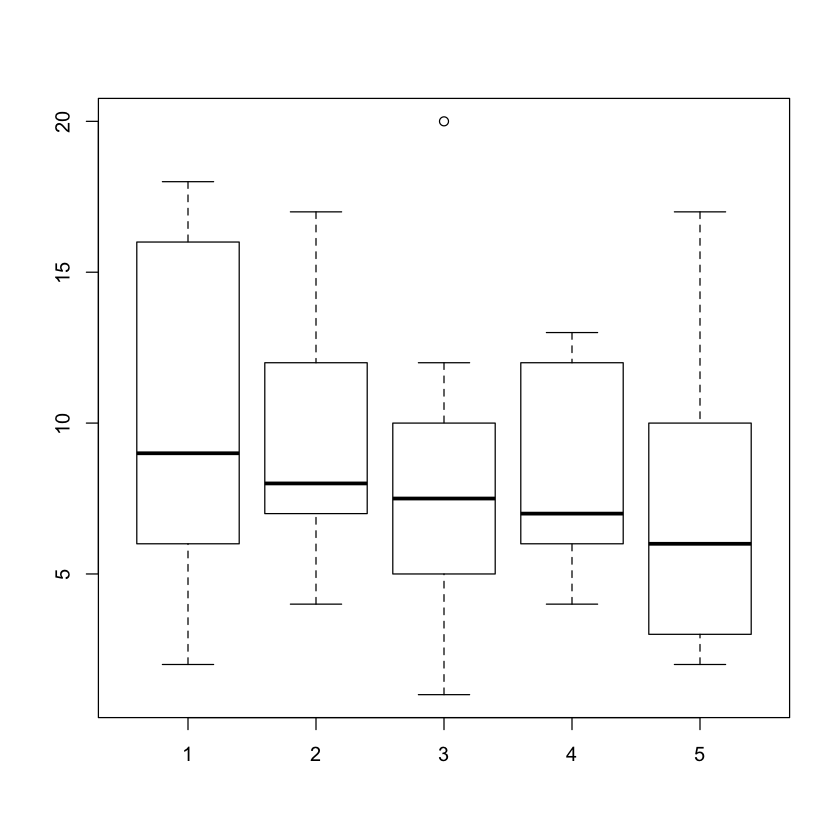

In [243]:
(function(number_of_dice, 
          number_of_sides, 
          number_of_rolls) 
    boxplot((
        replicate(
            number_of_dice, 
            sample(
                1:number_of_sides, 
                number_of_rolls, 
                replace = TRUE))))
 )(
    number_of_dice = 5, 
    number_of_rolls = 10, 
    number_of_sides = 20)

We can give the boxplot a title:

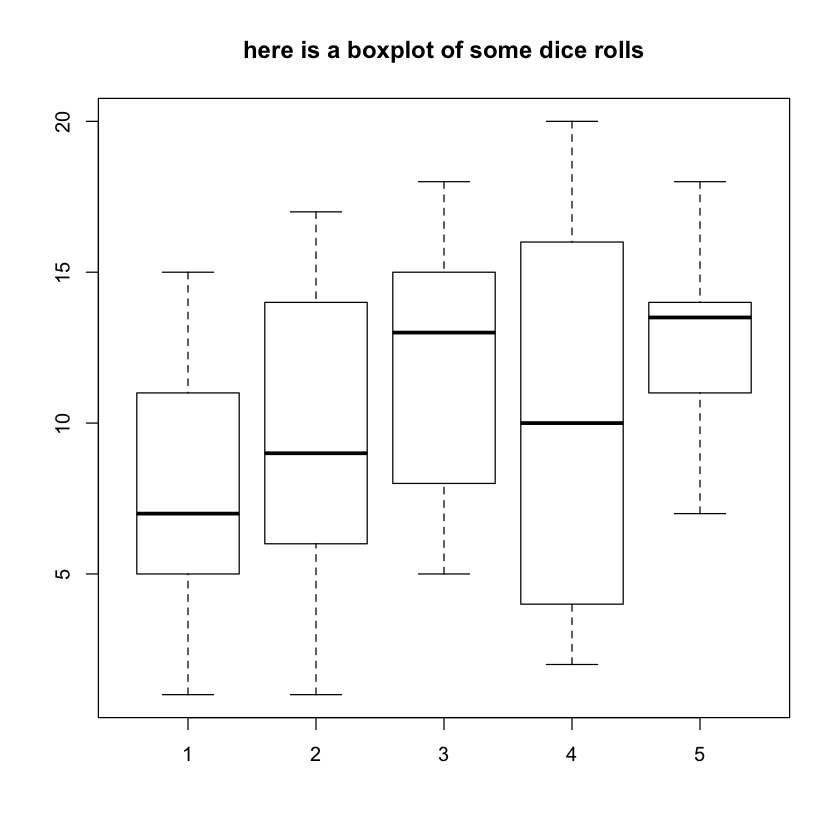

In [244]:
(function(number_of_dice, 
          number_of_sides, 
          number_of_rolls) 
    boxplot((
        replicate(
            number_of_dice, 
            sample(
                1:number_of_sides, 
                number_of_rolls, 
                replace = TRUE))), 
            main = 'here is a boxplot of some dice rolls')
 )(
    number_of_dice = 5, 
    number_of_rolls = 10, 
    number_of_sides = 20)

We can use `paste()` to pass the function arguments as parts of the title for the figure, by adding `main = paste('the ' , number_of_dice, ' ', number_of_sides, '-sided dice were rolled ', number_of_rolls, ' times', sep='')`

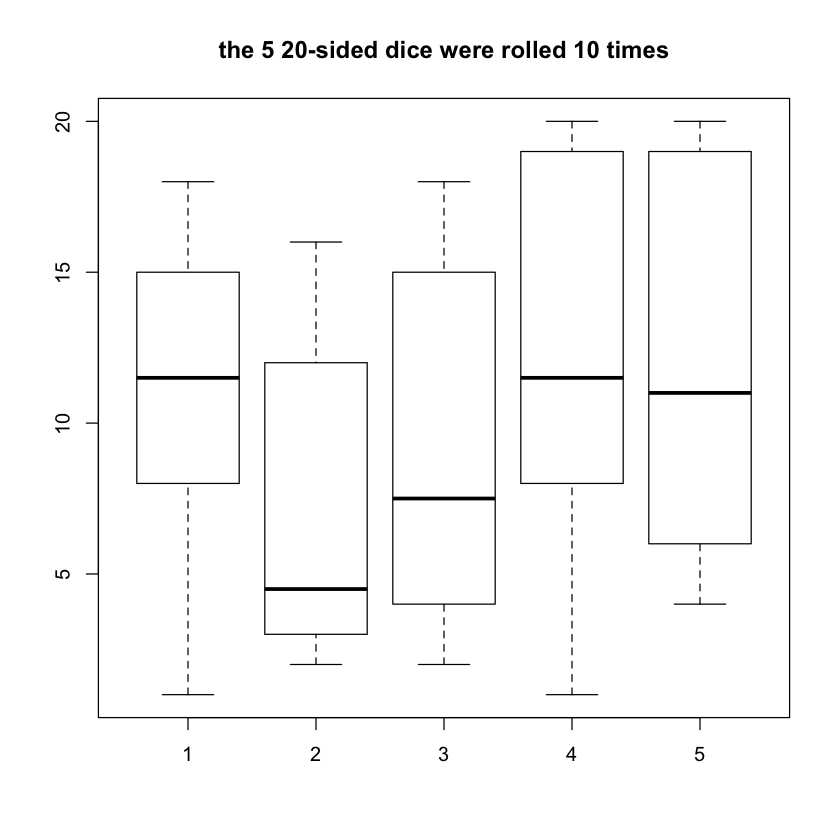

In [245]:
(function(number_of_dice, 
          number_of_sides, 
          number_of_rolls) 
    boxplot((
        replicate(
            number_of_dice, 
            sample(
                1:number_of_sides, 
                number_of_rolls, 
                replace = TRUE))), 
            main = paste(
        'the ' , number_of_dice, ' ', number_of_sides, '-sided dice were rolled ', number_of_rolls, ' times', 
                sep=''))
 )(
    number_of_dice = 5, 
    number_of_rolls = 10, 
    number_of_sides = 20)

We can add some colors to the figure by adding `col = c(1:number_of_dice)`, this will generate enough colors so that each bar has a different color:

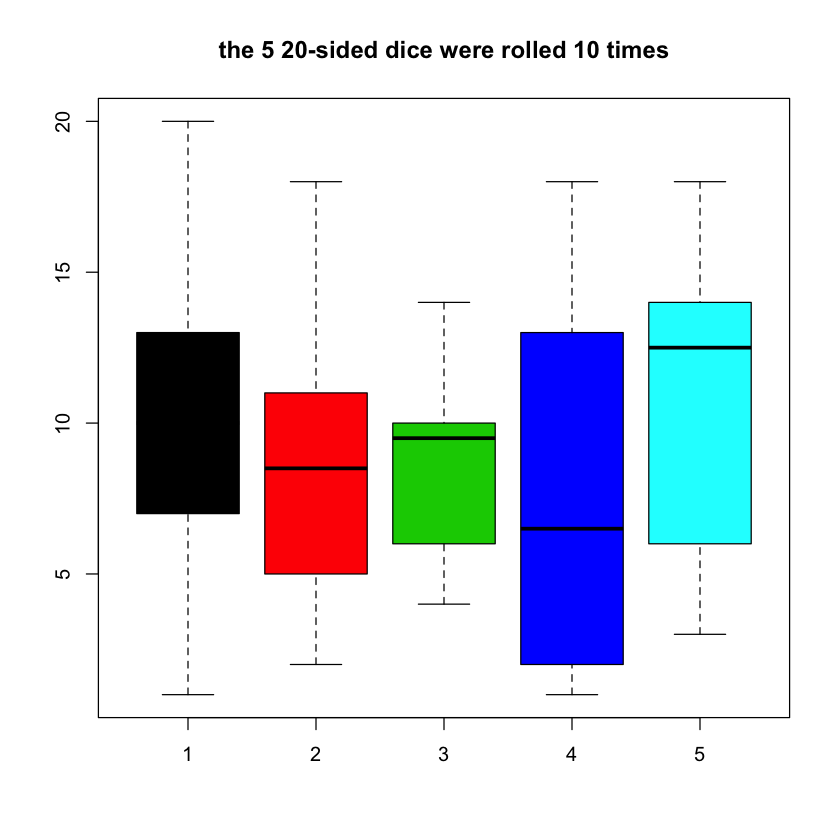

In [246]:
(function(number_of_dice, 
          number_of_sides, 
          number_of_rolls) 
    boxplot((
        replicate(
            number_of_dice, 
            sample(
                1:number_of_sides, 
                number_of_rolls, 
                replace = TRUE))), 
            main = paste(
        'the ' , number_of_dice, ' ', number_of_sides, '-sided dice were rolled ', number_of_rolls, ' times', 
                sep=''), 
           col = c(1:number_of_dice))
 )(
    number_of_dice = 5, 
    number_of_rolls = 10, 
    number_of_sides = 20)

# Importing and Exporting files
- Use the `write.table` or `write.csv` functions to write outputs in R.
- Lets use some of the pre-loaded data that comes with R. 

In [ ]:
iris <- data.frame(iris)
head(iris)

You can write the output to a file using `write.table` or `write.csv`:

In [ ]:
write.table(iris, file = '~/iris_table.txt')
write.csv(iris, file = '~/iris_csv.csv')

Let's try using `read.table` and `read.csv` to test out importing data:

In [ ]:
row.names(iris_csv2)

In [ ]:
iris_table2 <- read.table('~/iris_table.txt')

In [ ]:
iris_csv2 <- read.csv('~/iris_csv.csv')

In [ ]:
head(iris_table2)

In [ ]:
head(iris_csv2)

Notice that the `Species` column is a factor (`<fct>`). If we'd like text strings to be characters instead of factors when we import we can use `stringsAsFactors = FALSE`:

In [ ]:
iris_table <- read.table('~/iris_table.txt', stringsAsFactors = FALSE)
iris_csv <- read.csv('~/iris_csv.csv', stringsAsFactors = FALSE)

In [ ]:
head(iris_table)
head(iris_csv)

To convert back into a factor:

In [ ]:
iris_table$Species <- as.factor(iris_table$Species)
iris_csv$Species <- as.factor(iris_csv$Species)

In [ ]:
head(iris_table)
head(iris_csv)

Use `list.files()` get a list of all files in a directory:

In [ ]:
list.files(path = '~', pattern = 'iris_*')

# R packages
- Although R comes with many built in functions, you will probably want to install and use various R packages.
- You can install the packages using `install.packages('package_name_here')` (where you would replace 'package_name_here' with your package of choice, in quotes). 
- This will download the package and any additional required dependencies. 
- Uncomment out the next line (e.g., remove the #) to install the the 'ggplot2' package:

In [ ]:
install.packages('ggplot2')

Before you can actually use the package, you have to load it as follows:

In [ ]:
library('ggplot2')

Most R packages are found in CRAN - the central repository for R package. However, packages can be found in different places. Many of the packages of interest for biologists will be in Bioconductor. 

There are two steps to downloading a package from Bioconductor -- first, install BiocManager (again, remove the # to actually run the install).

In [ ]:
install.packages("BiocManager")

Then, load `BiocManager` and use `BiocManager::install()` to install a package.

In [ ]:
library('BiocManager')
BiocManager::install("org.Hs.eg.db")

Use the `sessionInfo()` function to see more information about your loaded R packages and namespace:

In [255]:
print(sessionInfo())

R version 3.5.2 (2018-12-20)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Mojave 10.14.2

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1      digest_0.6.20   zeallot_0.1.0   crayon_1.3.4   
 [5] IRdisplay_0.7.0 repr_1.0.1      backports_1.1.4 jsonlite_1.6   
 [9] evaluate_0.14   pillar_1.4.2    rlang_0.4.0     uuid_0.1-2     
[13] vctrs_0.2.0     IRkernel_1.0.2  tools_3.5.2     compiler_3.5.2 
[17] pkgconfig_2.0.2 base64enc_0.1-3 htmltools_0.3.6 pbdZMQ_0.3-3   
[21] tibble_2.1.3   


## The `apply()` functions
- R uses a family of `apply()` functions to repetitively manipulate objects while avoiding for loops. 
- How you use them will depend on the format of your data and what operations you're trying to perform.
- We will talk about `apply()`, `lapply()`, and `sapply()`.
- There is also `mapply()`, `vapply()`, `rapply()`, and `tapply()`, but we won't talk about those today.

- **`apply()`** Applies a function to an array (or matrix) and returns an array (or matrix)
- **`lapply()`** Applies a function to each element of a list or vector and returns a list
- **`sapply()`** Applies a function to each element of a list or vector and returns a vector


### `apply()` 
- `apply()` applies a function to an array (or matrix) and returns an array (or matrix)
- The general format of an `apply()` call is as follows:

```
apply(X, MARGIN, FUN, ...)

```
- `X` is the array or matrix to apply the function
- `MARGIN` is where the function should be applied - `1` is for rows, `2` is for columns, `c(1,2)` is rows and columns, can also be a character vector of dimension names if `X` has dimnames.
- `FUN` Function to be applied
Let's go back to the dice rolling function:

In [318]:
rolled_dice <- roll(number_of_rolls = 10, number_of_sides = 20, number_of_dice = 5)

In [319]:
print(rolled_dice)

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,]   17   16   18   19   20    1    9    6    9    20
[2,]    3    9   15    2    1   16   15   15   14     4
[3,]   10   10   20    4   19   16   14    7   20    12
[4,]    1   15   19   18   14   18   13   13   12     7
[5,]    5    9    8    1   16   12    2   10   20    11


In [284]:
class(rolled_dice)

[1] "matrix"

I'm going to name the rows and columns using the `paste()` and `dimnames()`:

In [320]:
dimnames(rolled_dice) <- list(
paste('roll', 1:5, sep = '_'),
    paste('die', 1:10, sep = '_'))

print(rolled_dice)

       die_1 die_2 die_3 die_4 die_5 die_6 die_7 die_8 die_9 die_10
roll_1    17    16    18    19    20     1     9     6     9     20
roll_2     3     9    15     2     1    16    15    15    14      4
roll_3    10    10    20     4    19    16    14     7    20     12
roll_4     1    15    19    18    14    18    13    13    12      7
roll_5     5     9     8     1    16    12     2    10    20     11


Let's try using `apply()` to increase every value by 1:

In [321]:
add_one <- apply(rolled_dice, c(1,2), function(element) element + 1)
class(add_one)
print(add_one)

[1] "matrix"

       die_1 die_2 die_3 die_4 die_5 die_6 die_7 die_8 die_9 die_10
roll_1    18    17    19    20    21     2    10     7    10     21
roll_2     4    10    16     3     2    17    16    16    15      5
roll_3    11    11    21     5    20    17    15     8    21     13
roll_4     2    16    20    19    15    19    14    14    13      8
roll_5     6    10     9     2    17    13     3    11    21     12


- The `c(1,2)` argument to `apply()` means that the function should apply to all rows and columns.
- What about if we use apply to calculate sums for each row and column?

If we use `1` it will apply the function to each row:

In [322]:
row_sums <- apply(rolled_dice, 1, function(element) sum(element))
print(row_sums)       

roll_1 roll_2 roll_3 roll_4 roll_5 
   135     94    132    130     94 


In [ ]:
If we use `2` it will apply the function to each column:

In [323]:
col_sums <- apply(rolled_dice, 2, function(element) sum(element))
print(col_sums) 

 die_1  die_2  die_3  die_4  die_5  die_6  die_7  die_8  die_9 die_10 
    36     59     80     44     70     63     53     51     75     54 


### `lapply()`

- `lapply()` works on lists and returns a list.
- Since a data frame is a series of lists, if you apply it to a data frame it will execute the function on each column of the data frame.
- The general format is as follows:

```
lapply(X, FUN)

```
- `X`  A vector or an object
- `FUN` Function applied to each element of X


In [336]:
rolled_dice_df <- as.data.frame(rolled_dice)
class(rolled_dice_df)

[1] "data.frame"

In [326]:
print(rolled_dice_df)

       die_1 die_2 die_3 die_4 die_5 die_6 die_7 die_8 die_9 die_10
roll_1    17    16    18    19    20     1     9     6     9     20
roll_2     3     9    15     2     1    16    15    15    14      4
roll_3    10    10    20     4    19    16    14     7    20     12
roll_4     1    15    19    18    14    18    13    13    12      7
roll_5     5     9     8     1    16    12     2    10    20     11


In [327]:
col_sums_df <- lapply(rolled_dice_df, sum)

In [328]:
str(col_sums_df)

List of 10
 $ die_1 : int 36
 $ die_2 : int 59
 $ die_3 : int 80
 $ die_4 : int 44
 $ die_5 : int 70
 $ die_6 : int 63
 $ die_7 : int 53
 $ die_8 : int 51
 $ die_9 : int 75
 $ die_10: int 54


In [330]:
rolled_dice

,die_1,die_2,die_3,die_4,die_5,die_6,die_7,die_8,die_9,die_10
roll_1,17,16,18,19,20,1,9,6,9,20
roll_2,3,9,15,2,1,16,15,15,14,4
roll_3,10,10,20,4,19,16,14,7,20,12
roll_4,1,15,19,18,14,18,13,13,12,7
roll_5,5,9,8,1,16,12,2,10,20,11


However, if you use `lapply()` to calculate sums on the `rolled_dice` matrix, you get back a very long list (since `lapply()` wants to return a list).

In [335]:
class(rolled_dice)

[1] "matrix"

In [337]:
col_sums <- lapply(rolled_dice, sum)
str(col_sums)

List of 50
 $ : int 17
 $ : int 3
 $ : int 10
 $ : int 1
 $ : int 5
 $ : int 16
 $ : int 9
 $ : int 10
 $ : int 15
 $ : int 9
 $ : int 18
 $ : int 15
 $ : int 20
 $ : int 19
 $ : int 8
 $ : int 19
 $ : int 2
 $ : int 4
 $ : int 18
 $ : int 1
 $ : int 20
 $ : int 1
 $ : int 19
 $ : int 14
 $ : int 16
 $ : int 1
 $ : int 16
 $ : int 16
 $ : int 18
 $ : int 12
 $ : int 9
 $ : int 15
 $ : int 14
 $ : int 13
 $ : int 2
 $ : int 6
 $ : int 15
 $ : int 7
 $ : int 13
 $ : int 10
 $ : int 9
 $ : int 14
 $ : int 20
 $ : int 12
 $ : int 20
 $ : int 20
 $ : int 4
 $ : int 12
 $ : int 7
 $ : int 11


### `sapply`

In [ ]:
- `sapply()` is similar to `lapply()`, but it returns a vector rather than a list.
- The general format for an `sapply()` call is as follows:

```
sapply(X, FUN)

```
- `X`  A vector or an object
- `FUN` Function applied to each element of x

In [338]:
col_sums_df <- sapply(rolled_dice_df, sum)

In [342]:
class(col_sums_df)
is.vector(col_sums_df)

[1] "integer"

[1] TRUE

In [343]:
print(col_sums_df)

 die_1  die_2  die_3  die_4  die_5  die_6  die_7  die_8  die_9 die_10 
    36     59     80     44     70     63     53     51     75     54 
